### Deliverable 1: Preprocessing the Data for a Neural Network

In [19]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import matplotlib as plt
import os
from tensorflow.keras.callbacks import ModelCheckpoint
import kerastuner as kt

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

C:\Users\keistlec\AppData\Local\Temp/ipykernel_28536/1505019267.py:9: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(["EIN","NAME"], axis = 1)
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [3]:
# Determine the number of unique values in each column.
application_cat = application_df.dtypes.index.tolist()
application_df[application_cat].nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
application_type_counts = application_df['APPLICATION_TYPE'].value_counts()
application_type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

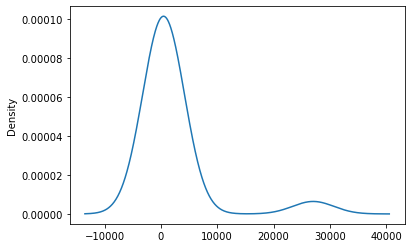

In [5]:
# Visualize the value counts of APPLICATION_TYPE
application_type_counts.plot.density()

In [6]:
# Determine which values to replace if counts are less than ...?
replace_application = list(application_type_counts[application_type_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
CLASSIFICATION_counts = application_df['CLASSIFICATION'].value_counts()
CLASSIFICATION_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

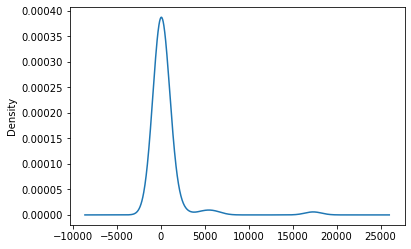

In [8]:
# Visualize the value counts of CLASSIFICATION
CLASSIFICATION_counts.plot.density()

In [9]:
# Determine which values to replace if counts are less than ..?
replace_class = list(CLASSIFICATION_counts[CLASSIFICATION_counts < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [10]:
#copy application_df for later use
application_3df = application_df

In [11]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

In [12]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

C:\opt\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
# Merge one-hot encoded features and drop the originals
application_df1 = application_df.merge(encode_df,left_index=True, right_index=True)
application_df1 = application_df1.drop(application_cat,1)
application_df1.head()

C:\Users\keistlec\AppData\Local\Temp/ipykernel_28536/2748540384.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  application_df1 = application_df1.drop(application_cat,1)


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
# Split our preprocessed data into our features and target arrays
y = application_df1["IS_SUCCESSFUL"].values
X = application_df1.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

C:\Users\keistlec\AppData\Local\Temp/ipykernel_28536/854115529.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = application_df1.drop(["IS_SUCCESSFUL"],1).values


In [15]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [16]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                3520      
_________________________________________________________________
dense_1 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/challengeweights.{epoch:02d}.hdf5"

In [25]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [26]:
# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    period=5)

In [27]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 1s 882us/step - loss: 0.5372 - accuracy: 0.7405
Epoch 2/100
804/804 [==============================] - 1s 915us/step - loss: 0.5370 - accuracy: 0.7400
Epoch 3/100
804/804 [==============================] - 1s 832us/step - loss: 0.5364 - accuracy: 0.7409
Epoch 4/100
804/804 [==============================] - 1s 801us/step - loss: 0.5366 - accuracy: 0.7400
Epoch 5/100
755/804 [===========================>..] - ETA: 0s - loss: 0.5361 - accuracy: 0.7407
Epoch 00005: saving model to checkpoints\challengeweights.05.hdf5
804/804 [==============================] - 1s 816us/step - loss: 0.5361 - accuracy: 0.7409
Epoch 6/100
804/804 [==============================] - 1s 804us/step - loss: 0.5367 - accuracy: 0.7406
Epoch 7/100
804/804 [==============================] - 1s 787us/step - loss: 0.5368 - accuracy: 0.7409
Epoch 8/100
804/804 [==============================] - 1s 804us/step - loss: 0.5363 - accuracy: 0.7408
Epoch 9/100
804/804 [====

804/804 [==============================] - 1s 850us/step - loss: 0.5346 - accuracy: 0.7418
Epoch 63/100
804/804 [==============================] - 1s 900us/step - loss: 0.5346 - accuracy: 0.7412
Epoch 64/100
804/804 [==============================] - 1s 872us/step - loss: 0.5348 - accuracy: 0.7407
Epoch 65/100
750/804 [==========================>...] - ETA: 0s - loss: 0.5324 - accuracy: 0.7431 ETA: 0s - loss: 0.5348 - accu
Epoch 00065: saving model to checkpoints\challengeweights.65.hdf5
804/804 [==============================] - 1s 886us/step - loss: 0.5343 - accuracy: 0.7413
Epoch 66/100
804/804 [==============================] - 1s 882us/step - loss: 0.5343 - accuracy: 0.7414
Epoch 67/100
804/804 [==============================] - 1s 892us/step - loss: 0.5340 - accuracy: 0.7413
Epoch 68/100
804/804 [==============================] - 1s 873us/step - loss: 0.5345 - accuracy: 0.7414
Epoch 69/100
804/804 [==============================] - 1s 890us/step - loss: 0.5340 - accuracy: 0.7416


In [28]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5614 - accuracy: 0.7256
Loss: 0.5614412426948547, Accuracy: 0.7255976796150208


In [21]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    period=5)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
804/804 [==============================] - 1s 874us/step - loss: 0.5363 - accuracy: 0.7411
Epoch 2/100
804/804 [==============================] - 1s 883us/step - loss: 0.5361 - accuracy: 0.7413
Epoch 3/100
804/804 [==============================] - 1s 859us/step - loss: 0.5357 - accuracy: 0.7420
Epoch 4/100
804/804 [==============================] - 1s 887us/step - loss: 0.5361 - accuracy: 0.7417
Epoch 5/100
751/804 [===========================>..] - ETA: 0s - loss: 0.5352 - accuracy: 0.7421
Epoch 00005: saving model to checkpoints\challengeweights.05.hdf5
804/804 [==============================] - 1s 886us/step - loss: 0.5354 - accuracy: 0.7416
Epoch 6/100
804/804 [==============================] - 1s 926us/step - loss: 0.5355 - accuracy: 0.7420
Epoch 7/100
804/804 [==============================] - 1s 833us/step - loss: 0.5353 - accuracy: 0.7413
Epoch 8/100
804/804 [==============================] - 1s 862us/step - loss: 0.5355 - accuracy: 0.7411
Epoch 9/100
804/804 [====

804/804 [==============================] - 1s 760us/step - loss: 0.5341 - accuracy: 0.7418
Epoch 62/100
804/804 [==============================] - 1s 760us/step - loss: 0.5338 - accuracy: 0.7418
Epoch 63/100
804/804 [==============================] - 1s 758us/step - loss: 0.5340 - accuracy: 0.7417
Epoch 64/100
804/804 [==============================] - 1s 763us/step - loss: 0.5339 - accuracy: 0.7416
Epoch 65/100
754/804 [===========================>..] - ETA: 0s - loss: 0.5337 - accuracy: 0.7425
Epoch 00065: saving model to checkpoints\challengeweights.65.hdf5
804/804 [==============================] - 1s 815us/step - loss: 0.5342 - accuracy: 0.7420
Epoch 66/100
804/804 [==============================] - 1s 782us/step - loss: 0.5336 - accuracy: 0.7423
Epoch 67/100
804/804 [==============================] - 1s 801us/step - loss: 0.5337 - accuracy: 0.7416
Epoch 68/100
804/804 [==============================] - 1s 833us/step - loss: 0.5338 - accuracy: 0.7417
Epoch 69/100
804/804 [========

In [22]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5635 - accuracy: 0.7256
Loss: 0.563544511795044, Accuracy: 0.7255976796150208


In [23]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity.h5")

In [24]:
#### Optimize your model in order to achieve a target predictive accuracy higher than 75% by using any or all of the following:

### Adjusting the input data to ensure that there are no variables or outliers that are causing confusion in the model, such as:
## Dropping more or fewer columns.
## Creating more bins for rare occurrences in columns.
## Increasing or decreasing the number of values for each bin.

### Adding more neurons to a hidden layer.
### Adding more hidden layers.
### Using different activation functions for the hidden layers.
### Adding or reducing the number of epochs to the training regimen.

In [25]:
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [26]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh', 'elu', 'softsign', 'softplus', 'elu', 'selu'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=100,
        max_value=200,
        step=20), activation=activation, input_dim=43))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 3)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=100,
            max_value=200,
            step=20),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

In [27]:
# Import the kerastuner library
import kerastuner as kt


tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=100,
    hyperband_iterations=10,
    overwrite=True,
    directory=os.path.normpath('C:/')
)

C:\Users\keistlec\AppData\Local\Temp/ipykernel_19596/1415201713.py:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [28]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=10,validation_data=(X_test_scaled,y_test))


Trial 1231 Complete [00h 00m 15s]
val_accuracy: 0.7268804907798767

Best val_accuracy So Far: 0.7301457524299622
Total elapsed time: 03h 49m 00s

Search: Running Trial #1232

Hyperparameter    |Value             |Best Value So Far 
activation        |tanh              |elu               
first_units       |180               |100               
num_layers        |3                 |2                 
units_0           |100               |160               
units_1           |200               |120               
units_2           |160               |180               
tuner/epochs      |12                |34                
tuner/initial_e...|0                 |0                 
tuner/bracket     |2                 |1                 
tuner/round       |0                 |0                 

Epoch 1/12
804/804 [==============================] - 1s 2ms/step - loss: 0.5795 - accuracy: 0.7184 - val_loss: 0.5628 - val_accuracy: 0.7221
Epoch 2/12
804/804 [==============================] - 1

KeyboardInterrupt: 

In [29]:
# Get top three model hyperparameters and print the values
top_hyper = tuner.get_best_hyperparameters(10)
for param in top_hyper:
    print(param.values)

{'activation': 'elu', 'first_units': 100, 'num_layers': 2, 'units_0': 160, 'units_1': 120, 'units_2': 180, 'tuner/epochs': 34, 'tuner/initial_epoch': 0, 'tuner/bracket': 1, 'tuner/round': 0}
{'activation': 'softsign', 'first_units': 140, 'num_layers': 3, 'units_0': 100, 'units_1': 160, 'units_2': 140, 'tuner/epochs': 100, 'tuner/initial_epoch': 34, 'tuner/bracket': 2, 'tuner/round': 2, 'tuner/trial_id': 'ed3256b77a10f50f3186615f5899bb6a'}
{'activation': 'tanh', 'first_units': 180, 'num_layers': 2, 'units_0': 160, 'units_1': 140, 'units_2': 140, 'tuner/epochs': 12, 'tuner/initial_epoch': 4, 'tuner/bracket': 3, 'tuner/round': 1, 'tuner/trial_id': 'c666f8ffd8fa1c358cde987d437e6e99'}
{'activation': 'tanh', 'first_units': 140, 'num_layers': 2, 'units_0': 120, 'units_1': 140, 'units_2': 200, 'tuner/epochs': 12, 'tuner/initial_epoch': 0, 'tuner/bracket': 2, 'tuner/round': 0}
{'activation': 'tanh', 'first_units': 140, 'num_layers': 2, 'units_0': 120, 'units_1': 140, 'units_2': 200, 'tuner/epoc

In [30]:
# Evaluate the top three models against the test dataset
top_model = tuner.get_best_models(10)
for model in top_model:
    model_loss, model_accuracy = model.evaluate(X_test_scaled,y_test,verbose=2)
    print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5524 - accuracy: 0.7301
Loss: 0.5523747801780701, Accuracy: 0.7301457524299622
268/268 - 0s - loss: 0.5551 - accuracy: 0.7300
Loss: 0.5550963282585144, Accuracy: 0.7300291657447815
268/268 - 0s - loss: 0.5633 - accuracy: 0.7299
Loss: 0.5632565021514893, Accuracy: 0.729912519454956
268/268 - 0s - loss: 0.5534 - accuracy: 0.7298
Loss: 0.5533934831619263, Accuracy: 0.7297959327697754
268/268 - 0s - loss: 0.5540 - accuracy: 0.7298
Loss: 0.5540497899055481, Accuracy: 0.7297959327697754
268/268 - 0s - loss: 0.5537 - accuracy: 0.7298
Loss: 0.5537121295928955, Accuracy: 0.7297959327697754
268/268 - 0s - loss: 0.5542 - accuracy: 0.7298
Loss: 0.5541781783103943, Accuracy: 0.7297959327697754
268/268 - 0s - loss: 0.5533 - accuracy: 0.7297
Loss: 0.5533487796783447, Accuracy: 0.72967928647995
268/268 - 0s - loss: 0.5548 - accuracy: 0.7297
Loss: 0.5548480749130249, Accuracy: 0.72967928647995
268/268 - 0s - loss: 0.5528 - accuracy: 0.7297
Loss: 0.5528170466423035, Accuracy: 0.72

In [31]:
ORGANIZATION_counts = application_df['ORGANIZATION'].value_counts()
ORGANIZATION_counts

Trust           23515
Association     10255
Co-operative      486
Corporation        43
Name: ORGANIZATION, dtype: int64

In [32]:
# Determine which values to replace if counts are less than ...?
replace_ORGANIZATION = list(ORGANIZATION_counts[ORGANIZATION_counts < 10000].index)

# Replace in dataframe
for app in replace_ORGANIZATION:
    application_df.ORGANIZATION = application_df.ORGANIZATION.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.ORGANIZATION.value_counts()

Trust          23515
Association    10255
Other            529
Name: ORGANIZATION, dtype: int64

In [33]:
STATUS_Counts = application_df['STATUS'].value_counts()
STATUS_Counts

1    34294
0        5
Name: STATUS, dtype: int64

In [34]:
application_df = application_df.drop(["STATUS"], axis = 1)
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,0,N,5000,1
1,T3,Independent,C2000,Preservation,Other,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,0,N,5000,1


In [35]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

In [36]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

C:\opt\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [37]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

C:\Users\keistlec\AppData\Local\Temp/ipykernel_19596/2023052568.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  application_df = application_df.drop(application_cat,1)


,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [38]:
# Split our preprocessed data into our features and target arrays
y = application_df1["IS_SUCCESSFUL"].values
X = application_df1.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

C:\Users\keistlec\AppData\Local\Temp/ipykernel_19596/854115529.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = application_df1.drop(["IS_SUCCESSFUL"],1).values


In [39]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [40]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 200
hidden_nodes_layer2 = 200
hidden_nodes_layer3 = 200
hidden_nodes_layer4 = 200
hidden_nodes_layer5 = 200
hidden_nodes_layer6 = 200

nn1_new = tf.keras.models.Sequential()

# First hidden layer
nn1_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="softsign"))

# Second hidden layer
nn1_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="elu"))

# Third hidden layer
nn1_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="softsign"))

# fourth hidden layer
nn1_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="elu"))

# 5 hidden layer
nn1_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer5, activation="softsign"))

# 6 hidden layer
nn1_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer6, activation="elu"))

# Output layer
nn1_new.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nn1_new.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    period=5)

# Train the model
fit_model = nn1_new.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn1_new.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5775 - accuracy: 0.7177
Epoch 2/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5649 - accuracy: 0.7267
Epoch 3/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5605 - accuracy: 0.7273
Epoch 4/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5578 - accuracy: 0.7303
Epoch 5/100
783/804 [============================>.] - ETA: 0s - loss: 0.5569 - accuracy: 0.7308
Epoch 00005: saving model to checkpoints\challengeweights.05.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5573 - accuracy: 0.7301
Epoch 6/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5553 - accuracy: 0.7321
Epoch 7/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5542 - accuracy: 0.7306
Epoch 8/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5531 - accuracy: 0.7310
Epoch 9/100
804/804 [====================

In [41]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 200
hidden_nodes_layer2 = 200
hidden_nodes_layer3 = 200
hidden_nodes_layer4 = 200
hidden_nodes_layer5 = 200
hidden_nodes_layer6 = 200

nn1_new = tf.keras.models.Sequential()

# First hidden layer
nn1_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn1_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="elu"))

# Third hidden layer
nn1_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# fourth hidden layer
nn1_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="elu"))

# 5 hidden layer
nn1_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer5, activation="relu"))

# 6 hidden layer
nn1_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer6, activation="elu"))

# Output layer
nn1_new.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nn1_new.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    period=5)

# Train the model
fit_model = nn1_new.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn1_new.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5725 - accuracy: 0.7236
Epoch 2/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5601 - accuracy: 0.7277
Epoch 3/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5565 - accuracy: 0.7302
Epoch 4/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5532 - accuracy: 0.7313
Epoch 5/100
779/804 [============================>.] - ETA: 0s - loss: 0.5526 - accuracy: 0.7325
Epoch 00005: saving model to checkpoints\challengeweights.05.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5531 - accuracy: 0.7318
Epoch 6/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5515 - accuracy: 0.7315
Epoch 7/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5507 - accuracy: 0.7332
Epoch 8/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5500 - accuracy: 0.7332
Epoch 9/100
804/804 [====================

In [42]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model1(hp):
    nn2_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu', 'softsign', 'elu'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn2_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=100,
        max_value=200,
        step=50), activation=activation, input_dim=43))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 3, 4)):
        nn2_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=100,
            max_value=200,
            step=50),
            activation=activation))
    
    nn2_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn2_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn2_model

In [43]:
tuner = kt.Hyperband(
    create_model1,
    objective="val_accuracy",
    max_epochs=150,
    hyperband_iterations=10,
    overwrite=True,
    directory=os.path.normpath('C:/')
)

In [44]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=10,validation_data=(X_test_scaled,y_test))

Trial 928 Complete [00h 00m 08s]
val_accuracy: 0.726064145565033

Best val_accuracy So Far: 0.7300291657447815
Total elapsed time: 04h 28m 36s
INFO:tensorflow:Oracle triggered exit


In [45]:
# Get top three model hyperparameters and print the values
top_hyper = tuner.get_best_hyperparameters(10)
for param in top_hyper:
    print(param.values)

{'activation': 'relu', 'first_units': 150, 'num_layers': 4, 'units_0': 200, 'units_1': 150, 'units_2': 200, 'units_3': 150, 'tuner/epochs': 6, 'tuner/initial_epoch': 2, 'tuner/bracket': 4, 'tuner/round': 1, 'tuner/trial_id': '680601480f7f74b193d780fad7be06f0'}
{'activation': 'softsign', 'first_units': 150, 'num_layers': 3, 'units_0': 200, 'units_1': 150, 'units_2': 100, 'units_3': 200, 'tuner/epochs': 17, 'tuner/initial_epoch': 0, 'tuner/bracket': 2, 'tuner/round': 0}
{'activation': 'relu', 'first_units': 150, 'num_layers': 4, 'units_0': 200, 'units_1': 100, 'units_2': 100, 'units_3': 150, 'tuner/epochs': 50, 'tuner/initial_epoch': 17, 'tuner/bracket': 4, 'tuner/round': 3, 'tuner/trial_id': '157c0767841ef94d096a486828a08cc8'}
{'activation': 'relu', 'first_units': 150, 'num_layers': 4, 'units_0': 100, 'units_1': 200, 'units_2': 200, 'units_3': 200, 'tuner/epochs': 6, 'tuner/initial_epoch': 0, 'tuner/bracket': 3, 'tuner/round': 0}
{'activation': 'softsign', 'first_units': 150, 'num_layer

In [46]:
# Evaluate the top three models against the test dataset
top_model = tuner.get_best_models(10)
for model in top_model:
    model_loss, model_accuracy = model.evaluate(X_test_scaled,y_test,verbose=2)
    print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5599 - accuracy: 0.7300
Loss: 0.5598909258842468, Accuracy: 0.7300291657447815
268/268 - 0s - loss: 0.5522 - accuracy: 0.7300
Loss: 0.552193284034729, Accuracy: 0.7300291657447815
268/268 - 0s - loss: 0.5510 - accuracy: 0.7299
Loss: 0.5510022640228271, Accuracy: 0.729912519454956
268/268 - 0s - loss: 0.5560 - accuracy: 0.7298
Loss: 0.5559978485107422, Accuracy: 0.7297959327697754
268/268 - 0s - loss: 0.5521 - accuracy: 0.7297
Loss: 0.5520638227462769, Accuracy: 0.72967928647995
268/268 - 0s - loss: 0.5543 - accuracy: 0.7297
Loss: 0.5543304681777954, Accuracy: 0.72967928647995
268/268 - 0s - loss: 0.5509 - accuracy: 0.7297
Loss: 0.550919234752655, Accuracy: 0.72967928647995
268/268 - 0s - loss: 0.5537 - accuracy: 0.7297
Loss: 0.5537031292915344, Accuracy: 0.72967928647995
268/268 - 0s - loss: 0.5504 - accuracy: 0.7296
Loss: 0.5503642559051514, Accuracy: 0.7295626997947693
268/268 - 0s - loss: 0.5510 - accuracy: 0.7296
Loss: 0.5509834885597229, Accuracy: 0.72956269

In [47]:
application_3df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Other,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [48]:
IS_SUCCESSFUL_df = application_3df.loc[application_3df['IS_SUCCESSFUL'] == 1]
IS_SUCCESSFUL_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Other,1,1-9999,N,108590,1
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
5,T3,Independent,C1200,Preservation,Trust,1,0,N,5000,1
...,...,...,...,...,...,...,...,...,...,...
34285,T3,Independent,C2000,Preservation,Trust,1,0,N,5000,1
34287,T3,Independent,C1200,Preservation,Trust,1,25000-99999,N,6713,1
34289,T3,Independent,C1000,Preservation,Trust,1,25000-99999,N,20197,1
34293,T3,CompanySponsored,C1000,Preservation,Association,1,0,N,5000,1


In [49]:
AT_Count_Successful = IS_SUCCESSFUL_df['APPLICATION_TYPE'].value_counts()
#AT_Count_Successful_DF = pd.DataFrame(AT_Count_Successful, columns=['ATC_Suc'])
AT_Count_Successful

T3       14388
T6         900
T5         900
T4         471
T10        464
T7         410
T8         311
Other      216
T19        201
Name: APPLICATION_TYPE, dtype: int64

In [50]:
At_Count_Totals = application_3df['APPLICATION_TYPE'].value_counts()
At_Count_Totals

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [51]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 300
hidden_nodes_layer2 = 300
hidden_nodes_layer3 = 300
hidden_nodes_layer4 = 300
hidden_nodes_layer5 = 300
hidden_nodes_layer6 = 300
hidden_nodes_layer7 = 300
hidden_nodes_layer8 = 300

nn_new = tf.keras.models.Sequential()

# First hidden layer
nn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# fourth hidden layer
nn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# 5 hidden layer
nn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer5, activation="relu"))

# 6 hidden layer
nn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer7, activation="relu"))

# 7 hidden layer
nn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer8, activation="relu"))

# 8 hidden layer
nn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer6, activation="relu"))

# Output layer
nn_new.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nn_new.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    period=5)

# Train the model
fit_model = nn_new.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn_new.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5747 - accuracy: 0.7190
Epoch 2/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5629 - accuracy: 0.7247
Epoch 3/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5584 - accuracy: 0.7239
Epoch 4/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5567 - accuracy: 0.7237
Epoch 5/100
795/804 [============================>.] - ETA: 0s - loss: 0.5564 - accuracy: 0.7264
Epoch 00005: saving model to checkpoints\challengeweights.05.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5562 - accuracy: 0.7265
Epoch 6/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5557 - accuracy: 0.7285
Epoch 7/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5535 - accuracy: 0.7297
Epoch 8/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5532 - accuracy: 0.7314
Epoch 9/100
804/804 [====================

In [23]:
last_try_df = application_3df
last_try_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [24]:
last_try_df = last_try_df.drop(["STATUS","SPECIAL_CONSIDERATIONS"], axis = 1)
last_try_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,0,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1-9999,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,0,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,6692,1
4,T3,Independent,C1000,Heathcare,Trust,100000-499999,142590,1
...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,0,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,0,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,0,5000,0
34297,T5,Independent,C3000,ProductDev,Association,0,5000,1


In [25]:
# Generate our categorical variable lists
application_cat5 = last_try_df.dtypes[last_try_df.dtypes == "object"].index.tolist()

In [26]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df5 = pd.DataFrame(enc.fit_transform(last_try_df[application_cat5]))

# Add the encoded variable names to the dataframe
encode_df5.columns = enc.get_feature_names(application_cat5)
encode_df5.head()

C:\opt\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [27]:
# Merge one-hot encoded features and drop the originals
last_try_df = last_try_df.merge(encode_df5,left_index=True, right_index=True)
last_try_df = last_try_df.drop(application_cat5,1)
last_try_df.head()

C:\Users\keistlec\AppData\Local\Temp/ipykernel_28536/606106502.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  last_try_df = last_try_df.drop(application_cat5,1)


,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [28]:
# Split our preprocessed data into our features and target arrays
y = last_try_df["IS_SUCCESSFUL"].values
X = last_try_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, random_state=78)

C:\Users\keistlec\AppData\Local\Temp/ipykernel_28536/1085714417.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = last_try_df.drop(["IS_SUCCESSFUL"],1).values


In [29]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train1)

# Scale the data
X_train_scaled1 = X_scaler.transform(X_train1)
X_test_scaled1 = X_scaler.transform(X_test1)

In [62]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train1[0])
hidden_nodes_layer1 = 500
hidden_nodes_layer2 = 500
hidden_nodes_layer3 = 500
hidden_nodes_layer4 = 500


nnn_new = tf.keras.models.Sequential()

# First hidden layer
nnn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nnn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nnn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# fourth hidden layer
nnn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# Output layer
nnn_new.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nnn_new.compile(loss="binary_crossentropy", optimizer="adamax", metrics=["accuracy"])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    period=5)

# Train the model
fit_model = nnn_new.fit(X_train_scaled1,y_train1,epochs=100,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nnn_new.evaluate(X_test_scaled1,y_test1,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5650 - accuracy: 0.7263
Epoch 2/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5555 - accuracy: 0.7307
Epoch 3/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5518 - accuracy: 0.7321
Epoch 4/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5498 - accuracy: 0.7333
Epoch 5/100
799/804 [============================>.] - ETA: 0s - loss: 0.5494 - accuracy: 0.7345
Epoch 00005: saving model to checkpoints\challengeweights.05.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.5493 - accuracy: 0.7345
Epoch 6/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5479 - accuracy: 0.7349
Epoch 7/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5465 - accuracy: 0.7362
Epoch 8/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5462 - accuracy: 0.7368
Epoch 9/100
804/804 [====================

In [64]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train1[0])
hidden_nodes_layer1 = 500
hidden_nodes_layer2 = 500
hidden_nodes_layer3 = 500
hidden_nodes_layer4 = 500


nnn_new = tf.keras.models.Sequential()

# First hidden layer
nnn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nnn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nnn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# fourth hidden layer
nnn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# Output layer
nnn_new.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nnn_new.compile(loss="binary_crossentropy", optimizer="SGD", metrics=["accuracy"])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    period=5)

# Train the model
fit_model = nnn_new.fit(X_train_scaled1,y_train1,epochs=100,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nnn_new.evaluate(X_test_scaled1,y_test1,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
804/804 [==============================] - 3s 3ms/step - loss: 0.6010 - accuracy: 0.7131
Epoch 2/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5598 - accuracy: 0.7296
Epoch 3/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5547 - accuracy: 0.7310
Epoch 4/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5523 - accuracy: 0.7329
Epoch 5/100
801/804 [============================>.] - ETA: 0s - loss: 0.5507 - accuracy: 0.7312
Epoch 00005: saving model to checkpoints\challengeweights.05.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5503 - accuracy: 0.7315
Epoch 6/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5492 - accuracy: 0.7338
Epoch 7/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5482 - accuracy: 0.7333
Epoch 8/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5476 - accuracy: 0.7338
Epoch 9/100
804/804 [====================

In [65]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train1[0])
hidden_nodes_layer1 = 500
hidden_nodes_layer2 = 500
hidden_nodes_layer3 = 500
hidden_nodes_layer4 = 500


nnn_new = tf.keras.models.Sequential()

# First hidden layer
nnn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nnn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nnn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# fourth hidden layer
nnn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# Output layer
nnn_new.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nnn_new.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    period=5)

# Train the model
fit_model = nnn_new.fit(X_train_scaled1,y_train1,epochs=100,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nnn_new.evaluate(X_test_scaled1,y_test1,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5723 - accuracy: 0.7224
Epoch 2/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5580 - accuracy: 0.7306
Epoch 3/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5545 - accuracy: 0.7312
Epoch 4/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5527 - accuracy: 0.7333
Epoch 5/100
803/804 [============================>.] - ETA: 0s - loss: 0.5515 - accuracy: 0.7344
Epoch 00005: saving model to checkpoints\challengeweights.05.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5516 - accuracy: 0.7344
Epoch 6/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5502 - accuracy: 0.7345
Epoch 7/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5499 - accuracy: 0.7324
Epoch 8/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5484 - accuracy: 0.7360
Epoch 9/100
804/804 [====================

In [66]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train1[0])
hidden_nodes_layer1 = 500
hidden_nodes_layer2 = 500
hidden_nodes_layer3 = 500
hidden_nodes_layer4 = 500


nnn_new = tf.keras.models.Sequential()

# First hidden layer
nnn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nnn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nnn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# fourth hidden layer
nnn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# Output layer
nnn_new.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nnn_new.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    period=5)

# Train the model
fit_model = nnn_new.fit(X_train_scaled1,y_train1,epochs=100,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nnn_new.evaluate(X_test_scaled1,y_test1,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
804/804 [==============================] - 5s 6ms/step - loss: 0.5780 - accuracy: 0.7246
Epoch 2/100
804/804 [==============================] - 6s 7ms/step - loss: 0.5658 - accuracy: 0.7307
Epoch 3/100
804/804 [==============================] - 6s 7ms/step - loss: 0.5623 - accuracy: 0.7318
Epoch 4/100
804/804 [==============================] - 5s 7ms/step - loss: 0.5611 - accuracy: 0.7321
Epoch 5/100
796/804 [============================>.] - ETA: 0s - loss: 0.5611 - accuracy: 0.7325
Epoch 00005: saving model to checkpoints\challengeweights.05.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.5612 - accuracy: 0.7323
Epoch 6/100
804/804 [==============================] - 5s 6ms/step - loss: 0.5610 - accuracy: 0.7321
Epoch 7/100
804/804 [==============================] - 5s 6ms/step - loss: 0.5607 - accuracy: 0.7321
Epoch 8/100
804/804 [==============================] - 5s 6ms/step - loss: 0.5596 - accuracy: 0.7328
Epoch 9/100
804/804 [====================

In [67]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train1[0])
hidden_nodes_layer1 = 500
hidden_nodes_layer2 = 500
hidden_nodes_layer3 = 500
hidden_nodes_layer4 = 500


nnn_new = tf.keras.models.Sequential()

# First hidden layer
nnn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nnn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nnn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# fourth hidden layer
nnn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# Output layer
nnn_new.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nnn_new.compile(loss="binary_crossentropy", optimizer="nadam", metrics=["accuracy"])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    period=5)

# Train the model
fit_model = nnn_new.fit(X_train_scaled1,y_train1,epochs=100,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nnn_new.evaluate(X_test_scaled1,y_test1,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
804/804 [==============================] - 8s 10ms/step - loss: 0.5709 - accuracy: 0.7240
Epoch 2/100
804/804 [==============================] - 8s 10ms/step - loss: 0.5570 - accuracy: 0.7311
Epoch 3/100
804/804 [==============================] - 9s 11ms/step - loss: 0.5548 - accuracy: 0.7316
Epoch 4/100
804/804 [==============================] - 9s 11ms/step - loss: 0.5530 - accuracy: 0.7310
Epoch 5/100
802/804 [============================>.] - ETA: 0s - loss: 0.5514 - accuracy: 0.7342
Epoch 00005: saving model to checkpoints\challengeweights.05.hdf5
804/804 [==============================] - 8s 10ms/step - loss: 0.5514 - accuracy: 0.7342
Epoch 6/100
804/804 [==============================] - 8s 10ms/step - loss: 0.5498 - accuracy: 0.7331
Epoch 7/100
804/804 [==============================] - 9s 11ms/step - loss: 0.5486 - accuracy: 0.7348
Epoch 8/100
804/804 [==============================] - 9s 11ms/step - loss: 0.5482 - accuracy: 0.7352
Epoch 9/100
804/804 [============

In [68]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train1[0])
hidden_nodes_layer1 = 500
hidden_nodes_layer2 = 500
hidden_nodes_layer3 = 500
hidden_nodes_layer4 = 500


nnn_new = tf.keras.models.Sequential()

# First hidden layer
nnn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nnn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nnn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# fourth hidden layer
nnn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# Output layer
nnn_new.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nnn_new.compile(loss="binary_crossentropy", optimizer="ftrl", metrics=["accuracy"])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    period=5)

# Train the model
fit_model = nnn_new.fit(X_train_scaled1,y_train1,epochs=100,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nnn_new.evaluate(X_test_scaled1,y_test1,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
804/804 [==============================] - 4s 5ms/step - loss: 0.6928 - accuracy: 0.5320
Epoch 2/100
804/804 [==============================] - 4s 5ms/step - loss: 0.6925 - accuracy: 0.5321
Epoch 3/100
804/804 [==============================] - 4s 5ms/step - loss: 0.6924 - accuracy: 0.5321
Epoch 4/100
804/804 [==============================] - 4s 5ms/step - loss: 0.6923 - accuracy: 0.5321
Epoch 5/100
799/804 [============================>.] - ETA: 0s - loss: 0.6922 - accuracy: 0.5321
Epoch 00005: saving model to checkpoints\challengeweights.05.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.6922 - accuracy: 0.5321
Epoch 6/100
804/804 [==============================] - 4s 5ms/step - loss: 0.6921 - accuracy: 0.5321
Epoch 7/100
804/804 [==============================] - 4s 5ms/step - loss: 0.6921 - accuracy: 0.5321
Epoch 8/100
804/804 [==============================] - 4s 5ms/step - loss: 0.6920 - accuracy: 0.5321
Epoch 9/100
804/804 [====================

In [35]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model3(hp):
    nn_model3 = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu', 'elu', 'softsign'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model3.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=0,
        max_value=600,
        step=200), activation=activation, input_dim=40))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 6, 8)):
        nn_model3.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=0,
            max_value=600,
            step=200),
            activation=activation))
    
    nn_model3.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model3.compile(loss="binary_crossentropy", optimizer='SGD', metrics=["accuracy"])
    
    return nn_model3

In [36]:
import kerastuner as kt

tuner = kt.Hyperband(
    create_model3,
    objective="val_accuracy",
    max_epochs=150,
    hyperband_iterations=10,
    overwrite=True,
    directory=os.path.normpath('C:/')
)

In [37]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled1,y_train1,epochs=10,validation_data=(X_test_scaled1,y_test1))

Trial 244 Complete [00h 01m 46s]
val_accuracy: 0.5331778526306152

Best val_accuracy So Far: 0.7290962338447571
Total elapsed time: 02h 24m 53s

Search: Running Trial #245

Hyperparameter    |Value             |Best Value So Far 
activation        |elu               |relu              
first_units       |200               |400               
num_layers        |7                 |8                 
units_0           |400               |200               
units_1           |200               |200               
units_2           |400               |200               
units_3           |400               |400               
units_4           |400               |400               
units_5           |600               |600               
units_6           |400               |200               
units_7           |200               |400               
tuner/epochs      |50                |150               
tuner/initial_e...|0                 |50                
tuner/bracket     |1         

KeyboardInterrupt: 

In [38]:
# Get top three model hyperparameters and print the values
top_hyper = tuner.get_best_hyperparameters(10)
for param in top_hyper:
    print(param.values)

{'activation': 'relu', 'first_units': 400, 'num_layers': 8, 'units_0': 200, 'units_1': 200, 'units_2': 200, 'units_3': 400, 'units_4': 400, 'units_5': 600, 'units_6': 200, 'units_7': 400, 'tuner/epochs': 150, 'tuner/initial_epoch': 50, 'tuner/bracket': 4, 'tuner/round': 4, 'tuner/trial_id': 'ac08e51a1abcb3caff18979264fcd2d1'}
{'activation': 'relu', 'first_units': 400, 'num_layers': 7, 'units_0': 200, 'units_1': 400, 'units_2': 400, 'units_3': 200, 'units_4': 400, 'units_5': 200, 'units_6': 400, 'units_7': 400, 'tuner/epochs': 150, 'tuner/initial_epoch': 50, 'tuner/bracket': 4, 'tuner/round': 4, 'tuner/trial_id': '8385edac723cf0fce8a8e970f8ddc3b9'}
{'activation': 'relu', 'first_units': 400, 'num_layers': 6, 'units_0': 600, 'units_1': 200, 'units_2': 400, 'units_3': 400, 'units_4': 400, 'units_5': 600, 'units_6': 600, 'units_7': 400, 'tuner/epochs': 50, 'tuner/initial_epoch': 17, 'tuner/bracket': 3, 'tuner/round': 2, 'tuner/trial_id': '9eb119dc023b33a90c5f998b85399386'}
{'activation': 'r

In [39]:
# Evaluate the top three models against the test dataset
top_model = tuner.get_best_models(10)
for model in top_model:
    model_loss, model_accuracy = model.evaluate(X_test_scaled,y_test,verbose=2)
    print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

ValueError: in user code:

    C:\opt\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1224 test_function  *
        return step_function(self, iterator)
    C:\opt\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1215 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\opt\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\opt\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\opt\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\opt\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1208 run_step  **
        outputs = model.test_step(data)
    C:\opt\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1174 test_step
        y_pred = self(x, training=False)
    C:\opt\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\opt\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:212 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected axis -1 of input shape to have value 40 but received input with shape [None, 43]


In [33]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model4(hp):
    mm_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu', 'elu', 'softsign', 'softmax'],)
    
    # Allow kerastuner to decide number of neurons in first layer
    mm_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=10,
        max_value=50,
        step=20), activation=activation, input_dim=40))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 2, 8)):
        mm_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=10,
            max_value=50,
            step=20),
            activation=activation))
    
    mm_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    mm_model.compile(loss="binary_crossentropy", optimizer='SGD', metrics=["accuracy"])
    
    return mm_model

In [34]:
tuner = kt.Hyperband(
    create_model4,
    objective="val_accuracy",
    max_epochs=100,
    hyperband_iterations=5,
    overwrite=True,
    directory=os.path.normpath('C:/untilted_project/new_folder')
)

In [35]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled1,y_train1,epochs=100,validation_data=(X_test_scaled1,y_test1))

Trial 1270 Complete [00h 01m 16s]
val_accuracy: 0.728396475315094

Best val_accuracy So Far: 0.7300291657447815
Total elapsed time: 03h 24m 02s
INFO:tensorflow:Oracle triggered exit


In [36]:
# Get top three model hyperparameters and print the values
top_hyper = tuner.get_best_hyperparameters(10)
for param in top_hyper:
    print(param.values)

{'activation': 'relu', 'first_units': 30, 'num_layers': 7, 'units_0': 10, 'units_1': 30, 'units_2': 50, 'units_3': 30, 'units_4': 50, 'units_5': 10, 'units_6': 10, 'units_7': 30, 'tuner/epochs': 100, 'tuner/initial_epoch': 34, 'tuner/bracket': 1, 'tuner/round': 1, 'tuner/trial_id': '0baacd1a5d84b0aed1b2c8242da06b58'}
{'activation': 'relu', 'first_units': 50, 'num_layers': 5, 'units_0': 30, 'units_1': 10, 'units_2': 10, 'units_3': 30, 'units_4': 30, 'units_5': 10, 'units_6': 30, 'units_7': 10, 'tuner/epochs': 34, 'tuner/initial_epoch': 0, 'tuner/bracket': 1, 'tuner/round': 0}
{'activation': 'elu', 'first_units': 30, 'num_layers': 7, 'units_0': 50, 'units_1': 30, 'units_2': 30, 'units_3': 30, 'units_4': 10, 'units_5': 30, 'units_6': 30, 'units_7': 30, 'tuner/epochs': 100, 'tuner/initial_epoch': 34, 'tuner/bracket': 4, 'tuner/round': 4, 'tuner/trial_id': '3a01a7c3f6b16cb4a27c623d65c7f01c'}
{'activation': 'relu', 'first_units': 50, 'num_layers': 2, 'units_0': 30, 'units_1': 30, 'units_2': 

In [38]:
# Evaluate the top three models against the test dataset
top_model = tuner.get_best_models(10)
for model in top_model:
    model_loss, model_accuracy = model.evaluate(X_test_scaled1,y_test1,verbose=2)
    print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5511 - accuracy: 0.7300
Loss: 0.5511174201965332, Accuracy: 0.7300291657447815
268/268 - 0s - loss: 0.5521 - accuracy: 0.7298
Loss: 0.5520796775817871, Accuracy: 0.7297959327697754
268/268 - 0s - loss: 0.5501 - accuracy: 0.7298
Loss: 0.5501348376274109, Accuracy: 0.7297959327697754
268/268 - 0s - loss: 0.5517 - accuracy: 0.7297
Loss: 0.551685094833374, Accuracy: 0.72967928647995
268/268 - 0s - loss: 0.5519 - accuracy: 0.7297
Loss: 0.5518661737442017, Accuracy: 0.72967928647995
268/268 - 0s - loss: 0.5514 - accuracy: 0.7297
Loss: 0.5514008402824402, Accuracy: 0.72967928647995
268/268 - 0s - loss: 0.5533 - accuracy: 0.7297
Loss: 0.5532630681991577, Accuracy: 0.72967928647995
268/268 - 0s - loss: 0.5535 - accuracy: 0.7296
Loss: 0.5534719824790955, Accuracy: 0.7295626997947693
268/268 - 0s - loss: 0.5527 - accuracy: 0.7296
Loss: 0.5526703000068665, Accuracy: 0.7295626997947693
268/268 - 0s - loss: 0.5531 - accuracy: 0.7292
Loss: 0.5531467795372009, Accuracy: 0.729212